# Loan Data from Prosper Exploration
## by Kaori Ishikawa

## Preliminary Wrangling

This document explores a datasets containing approximately 114,000 loans data from Prosper, a peer-to-peer lending platform, including loan amount, borrower rate, current loan status and so on.

In [235]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [236]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [237]:
df_loan = df.copy()

In [238]:
df_loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [239]:
# Overview of the data shape and composition
print(df_loan.shape)
df_loan.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [198]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most of the variables are numeric in nature, but some should be treated as categorical data (ordinal) such as Prosper Score.


### What is/are the main feature(s) of interest in your dataset?

I'm most intered in figureing out what factors in the dataset affect Borrower APR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the credit score will have the strongest effect on the loan's outcome. Also, I think that the income ratio of the borrower, ocupation,  
As there are many features, I will focus on these features in each nature of features.
> -Borrower's credit grade : Prosper rating (numeric)<br>
-Borrower's income/asset related data :occupation,  employment status, employment status duration, home owener or not<br>
-Borrower's financial related data : Income, dead to income ratio, delinquencies, public records(last 12 moths), percentage of available revolving credit, revolving credit balance<br>
-Loan detail : listing category, loan original amount, Borrower's APR<br>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [199]:
# drop some features
keep_col = ['ListingNumber','LoanStatus', 'ProsperRating (numeric)', 'BorrowerAPR','LoanOriginalAmount','ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
           'IsBorrowerHomeowner', 'CreditScoreRangeLower','RevolvingCreditBalance', 'BankcardUtilization', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome']
df_loan = df_loan[keep_col]

In [188]:
df_loan.shape, df_loan[df_loan.LoanStatus == 'Defaulted'].shape

((113937, 28), (5018, 28))

Now I have only 27 columns. Also, this datasets includes 5,018 defaults.

### Credit grade

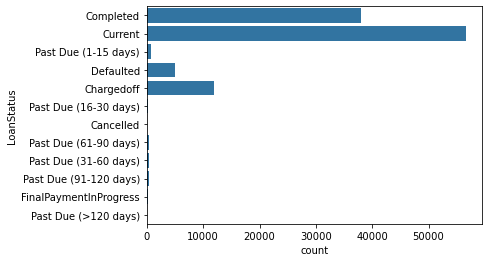

In [144]:
# start with a standard - scaled plot
base_color = sb.color_palette()[0]
sb.countplot(data = df_loan,  y = 'LoanStatus', color = base_color);

Over 50,000 loans are still on going and the completed loans are less than 40,000. Defaulted loans are around 5,000.
Also, as the number of past due loans are small, I will make it into one category. And, I will include Final payment in progress in current as well.
And, I will removed the cancelled rows as well.

In [223]:
df_loan.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [225]:
# update data
df_loan['LoanStatus'] = df_loan['LoanStatus'].replace({'Past Due (1-15 days)':'Past Due', 'Past Due (16-30 days)':'Past Due', 'Past Due (31-60 days)':'Past Due', 'Past Due (61-90 days)':'Past Due',
                                                      'Past Due (91-120 days)':'Past Due', 'Past Due (>120 days)': 'Past Due', 'FinalPaymentInProgress':'Current'})


In [229]:
# Remove the row with Cancelled data
df_loan = df_loan[df_loan['LoanStatus'] != 'Cancelled']

In [230]:
#Check
df_loan['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff'],
      dtype=object)

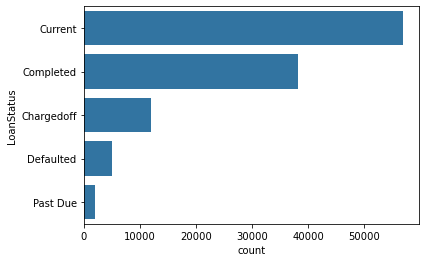

In [232]:
# Re-plot
sb.countplot(data = df_loan,  y = 'LoanStatus', color = base_color, order = df_loan.LoanStatus.value_counts().index);

To focus on the end-status, I will remove Current and past due data.


In [234]:
df_loan = df_loan[(df_loan['LoanStatus'] != 'Current')|(df_loan['LoanStatus'] != 'Past Due')]


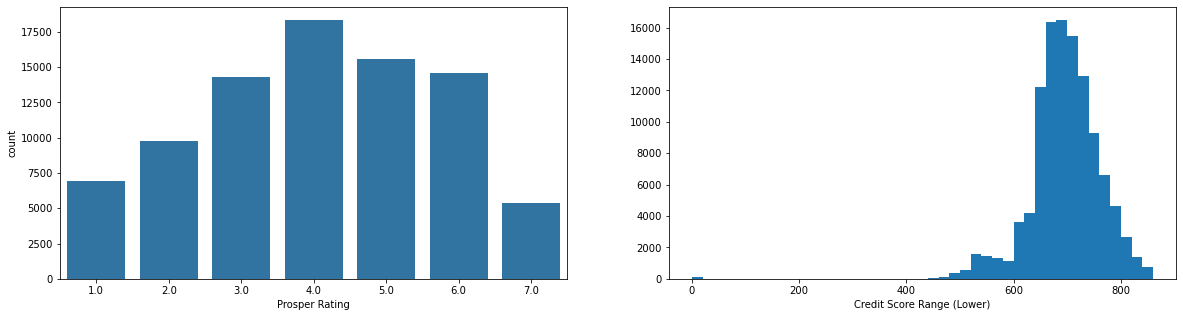

In [145]:
# Next, credit grade

plt.figure(figsize = [20,5])


plt.subplot(1,2,1)
sb.countplot(data = df_loan,  x = 'ProsperRating (numeric)', color = base_color)
plt.xlabel('Prosper Rating');

plt.subplot(1,2,2)
bins_csr = np.arange(0,df_loan.CreditScoreRangeLower.max(), 20 )
plt.hist(data = df_loan,  x = 'CreditScoreRangeLower', color = base_color, bins = bins_csr)
plt.xlabel('Credit Score Range (Lower)');



Prosper rating (0-7) is slightly left-skewed. Credit score range has sudden increase on the left side of the graph while there is more smooth decline on the right side. As there is no significant difference in 

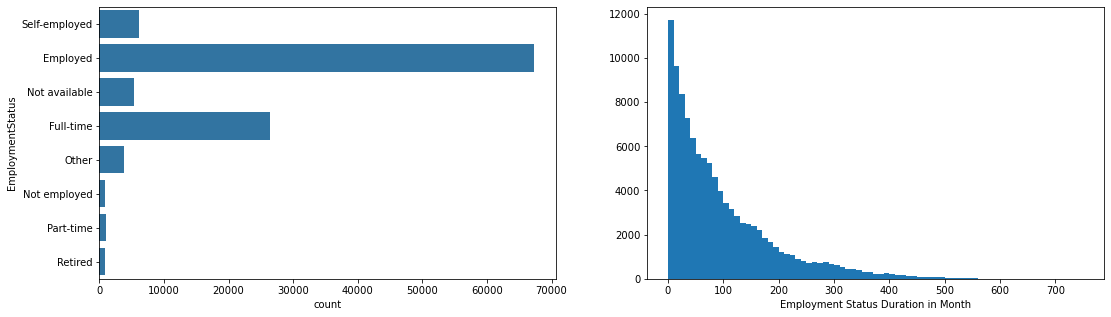

In [146]:
# Next, employment status and duration
plt.figure(figsize = [18,5])


plt.subplot(1,2,1)
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color);

plt.subplot(1,2,2)
bins_emp = np.arange(0,df_loan.EmploymentStatusDuration.max(), 10 )
plt.hist(data = df_loan,  x = 'EmploymentStatusDuration', color = base_color, bins = bins_emp)
plt.xlabel('Employment Status Duration in Month');


Most of the people in the datasets are employed. Full-time and Part-time category are not clear what it exactly means here. In terms of the duration of employment, it is relatively short, however it needs to be compared with general data to asess if this is shorter than the avergage or not.

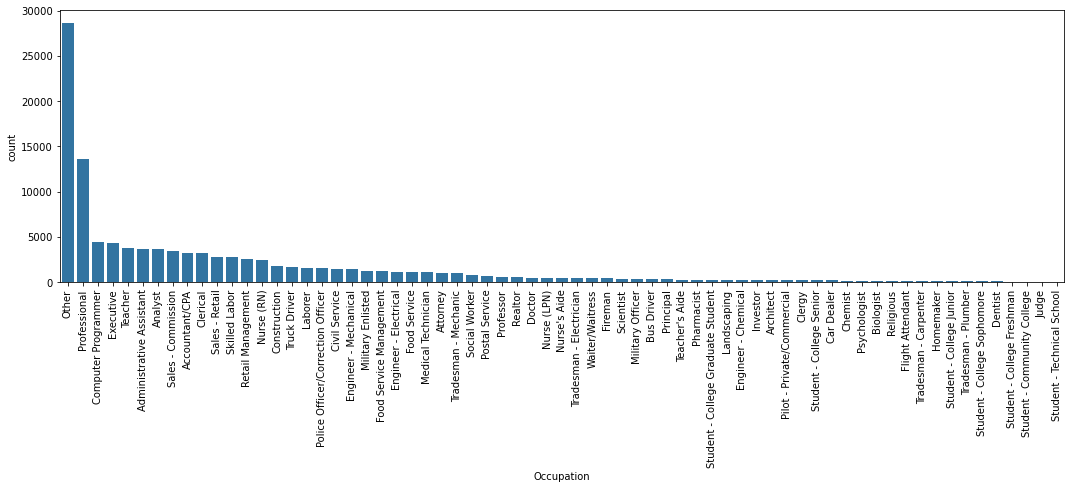

In [147]:
# Next, occupation
plt.figure(figsize = [18,5])
df_loan
sb.countplot(data = df_loan,  x = 'Occupation', color = base_color, order = df_loan.Occupation.value_counts().index)
plt.xticks(rotation = 90);



Most of the people are categorised as "Other" and it might be difficlt to further assess.

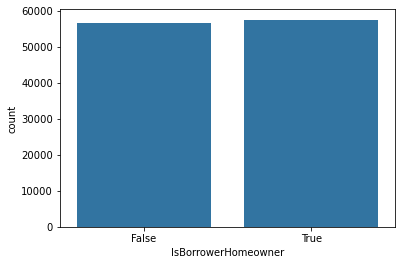

In [148]:
# Next, Home ownership
sb.countplot(data = df_loan,  x = 'IsBorrowerHomeowner', color = base_color);


Almost 50-50.

In [149]:
# Next, income
df_loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

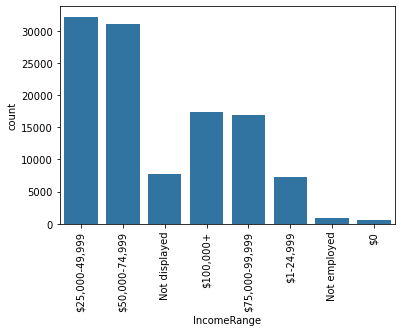

In [150]:
# Next, income
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color)
plt.xticks(rotation = 90);

I will include "not amployed" in $0, and chaneg not displayed in to NA.

In [151]:
df_loan['IncomeRange'].replace('Not displayed',np.nan, inplace = True)

In [152]:
df_loan['IncomeRange'].replace('Not employed','$0', inplace = True)

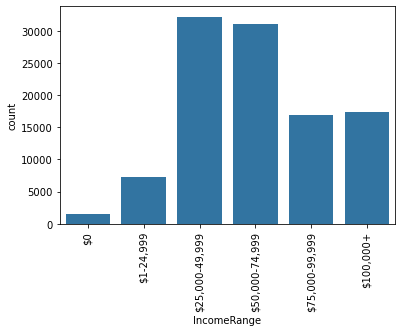

In [153]:
# plot it again
order_inc = ['$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999','$100,000+']
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color, order = order_inc)
plt.xticks(rotation = 90);

In [154]:
df_loan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

It is left skewed and overall, the income of the people borrowing money is relatively high.

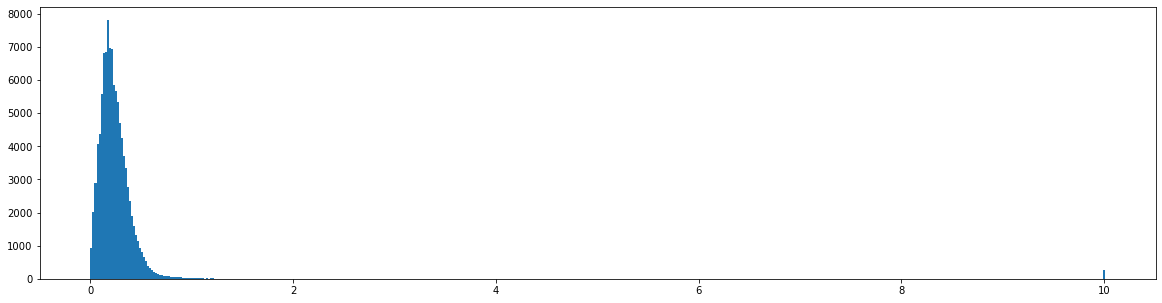

In [155]:
# Next, debt to income racio
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

This initial plot show most of the data to the far left of their axies, suggesting some strong outliers on the right.
Let's take a look to see if they need to be filtered out of the data.

In [156]:
df_loan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [157]:
# Select high outliers, using criteria eyeballed from the plot.

outliers = (df_loan['DebtToIncomeRatio'] > 1.5)
print(outliers.sum())
df_loan.loc[outliers, :]

555


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
22,101735700321773921526BF,706927,2013-01-30 09:36:13.783000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-35.80,0.0,0.0,0.0,0.0,1.0,0,0,0.0,94
226,2EA63382419173023274969,104542,2007-02-28 10:45:44.153000000,D,36,Completed,2009-07-07 00:00:00,0.11749,0.1000,0.0900,...,-10.10,0.0,0.0,0.0,0.0,1.0,0,0,0.0,16
368,00F033886616529869C3281,128819,2007-04-25 19:19:24.050000000,C,36,Completed,2007-06-19 00:00:00,0.20735,0.2000,0.1850,...,-15.31,0.0,0.0,0.0,0.0,1.0,0,0,0.0,74
576,3C18338635952151669AA4C,124494,2007-04-16 17:44:06.780000000,AA,36,Completed,2007-06-28 00:00:00,0.10505,0.0935,0.0885,...,-1.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,58
626,45C73538911628429AAB1CD,560943,2012-02-20 16:08:45.633000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-30.44,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113258,F0903556207847780991044,627138,2012-08-21 13:57:58.080000000,NaN,60,Defaulted,2013-09-17 00:00:00,0.27554,0.2498,0.2398,...,-27.94,0.0,0.0,0.0,0.0,1.0,0,0,0.0,17
113367,F3693583883111490E56B31,827764,2013-07-03 07:07:34.657000000,NaN,36,Completed,2013-09-30 00:00:00,0.35356,0.3134,0.3034,...,-4.53,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113387,DF323501487653892C93A36,485381,2010-11-22 17:23:22.623000000,NaN,36,Completed,2013-08-22 00:00:00,0.39153,0.3500,0.3400,...,-24.71,0.0,0.0,0.0,0.0,1.0,0,0,0.0,17
113407,F3703411198534084FE3FAC,274103,2008-01-31 10:27:02.483000000,C,36,Completed,2011-02-15 00:00:00,0.25163,0.2365,0.2265,...,-23.75,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23


I see suspecious StatedMonthlyIncome of 0.083333.

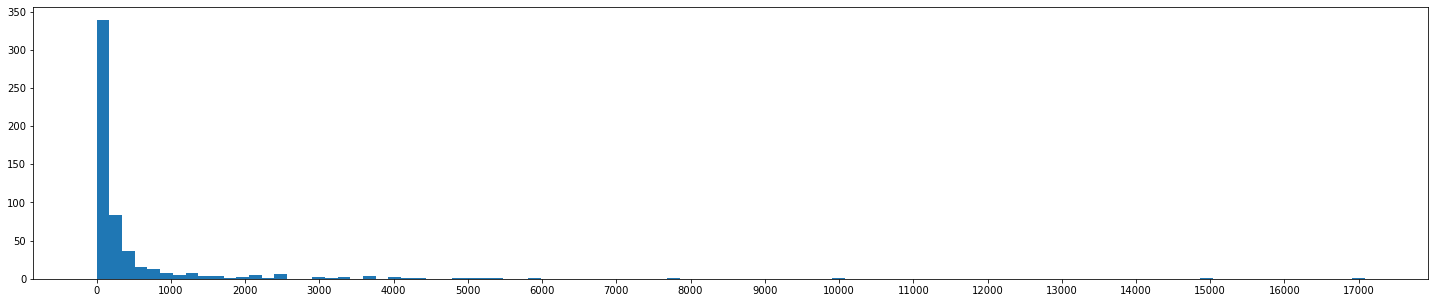

In [158]:
# plot the income of people with higher than 
plt.figure(figsize = [25,5])
plt.hist(data = df_loan.loc[outliers, :], x = 'StatedMonthlyIncome', bins = 100)
plt.xticks(np.arange(0, df_loan.loc[outliers, :].StatedMonthlyIncome.max(), 1000));



In [159]:
df_loan.loc[df_loan['StatedMonthlyIncome'] <= 0.083333, :]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
78,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.18454,0.1700,0.1600,...,-15.66,0.00,4381.62,4381.62,0.0,1.0,0,0,0.0,115
100,0F67356860455769574096F,704916,2013-01-25 11:48:26.040000000,NaN,36,Chargedoff,2013-08-30 00:00:00,0.35356,0.3134,0.3034,...,-6.41,0.00,3855.23,3855.23,0.0,1.0,0,0,0.0,73
108,10C034203841683992703F1,321000,2008-04-29 08:26:00.340000000,C,36,Completed,2011-03-17 00:00:00,0.28320,0.2600,0.2500,...,-242.09,0.00,0.00,0.00,0.0,1.0,0,0,0.0,53
125,10EC3516168266498E5E38A,506130,2011-05-10 12:53:38.783000000,NaN,36,Current,NaN,0.35643,0.3199,0.3099,...,-88.21,0.00,0.00,0.00,0.0,1.0,0,0,0.0,92
146,34B03365511229087456DB5,31745,2006-08-16 09:43:10.867000000,A,36,Completed,2006-12-04 00:00:00,0.09939,0.0925,0.0850,...,-4.61,0.00,0.00,0.00,0.0,1.0,0,0,0.0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113686,FDD83406389901620745200,244319,2007-12-04 18:18:14.747000000,A,36,Completed,2008-09-24 00:00:00,0.21588,0.2085,0.1985,...,-106.36,0.00,0.00,0.00,0.0,1.0,0,1,50.0,260
113761,E40A354460558377113BCF1,580125,2012-04-18 11:49:35.887000000,NaN,60,Current,NaN,0.16151,0.1385,0.1285,...,-102.46,0.00,0.00,0.00,0.0,1.0,0,0,0.0,9
113766,DE463545471486142487A42,579432,2012-04-16 17:49:05.693000000,NaN,36,Current,NaN,0.12427,0.0964,0.0864,...,-60.91,-11.56,0.00,0.00,0.0,1.0,0,0,0.0,71
113767,DE48341184370727282B3F4,269403,2008-01-22 07:15:09.207000000,HR,36,Chargedoff,2009-06-05 00:00:00,0.36945,0.3450,0.3350,...,-41.78,0.00,3969.04,3969.03,0.0,1.0,1,1,50.0,5


In [160]:
df_loan.loc[df_loan['StatedMonthlyIncome'] == 0.083333, :].IncomeRange.unique()

array([nan, '$1-24,999', '$0', '$50,000-74,999', '$25,000-49,999',
       '$100,000+'], dtype=object)

There are datasets not matching with the income range. I will filter this out.

In [161]:
incorrect = (df_loan['StatedMonthlyIncome'] <= 0.083333)

In [162]:
df_loan = df_loan.loc[-incorrect, :]

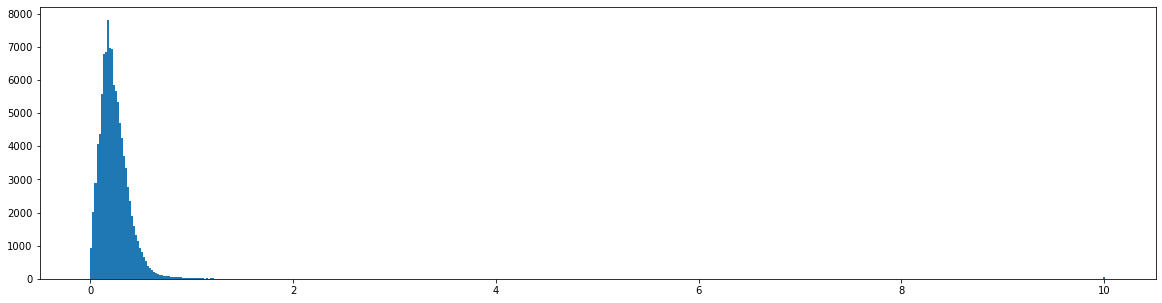

In [163]:
# re-plot the distribution
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

In [164]:
***********************************check contents 

SyntaxError: invalid syntax (<ipython-input-164-7f35953d3793>, line 1)

In [ ]:
# plot the histgram forcused to the data whose debt to income ratio is lower than 1.5
plt.figure(figsize = [20,5])
plt.hist(data = df_loan[df_loan.DebtToIncomeRatio < 1.5], x = 'DebtToIncomeRatio', color = base_color, bins = 40);

It is unimodal and right skewed. 

In [ ]:
# Now let's check the Delinquencies
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
plt.hist(data = df_loan, x = 'CurrentDelinquencies', bins = 40);

plt.subplot(1,2,2)
plt.hist(data = df_loan, x = 'AmountDelinquent', bins = 100 );

This initial plot show most of the data to the far left of their axies, suggesting some strong outliers on the right. Let's take a look to see if they need to be filtered out of the data.

In [ ]:
df_loan.loc[df_loan.CurrentDelinquencies > 20]

In [165]:
df_loan.loc[df_loan.CurrentDelinquencies > 20, ].LoanStatus.value_counts()

Chargedoff               52
Defaulted                43
Completed                32
Current                   3
Past Due (16-30 days)     1
Past Due (31-60 days)     1
Name: LoanStatus, dtype: int64

Those outlier has high Chargedoff/Defaulted chance. Therefore, I will keep it for the further analysis.

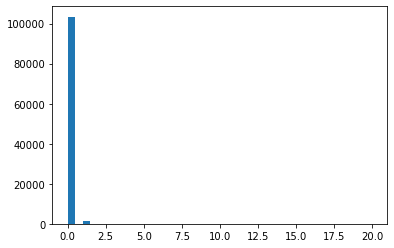

In [166]:
# Now public record.

plt.hist(data = df_loan, x = 'PublicRecordsLast12Months', bins = 40);

In [167]:
df_loan.PublicRecordsLast12Months.value_counts()

0.0     103435
1.0       1236
2.0         91
3.0         28
4.0         10
7.0          2
20.0         1
Name: PublicRecordsLast12Months, dtype: int64

Most of the people has 0 public records.

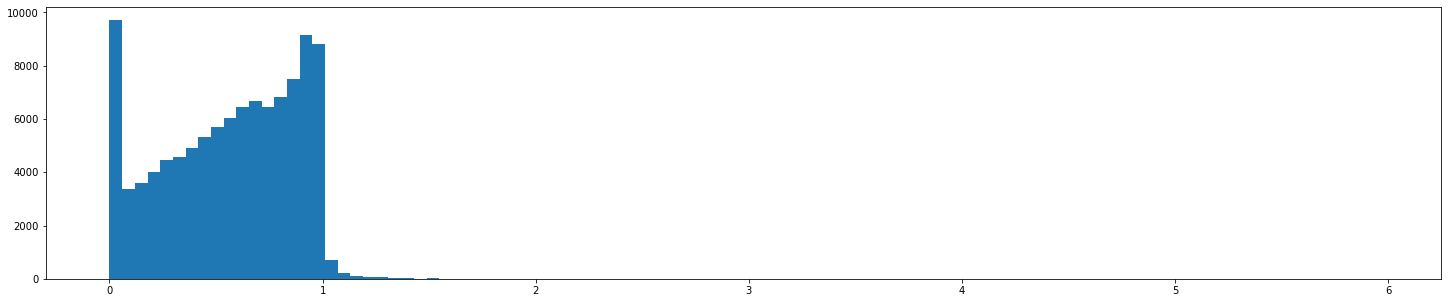

In [168]:
# Let's look at the revolving 
plt.figure(figsize = [25,5])
plt.hist(data = df_loan, x = 'BankcardUtilization', bins = 100);

This feature can be over 100%. While 0 is the highest frequency but the rest has a slight upwords trends towards 100%. And this graph shows there are strong outligher on the right side.

In [169]:
df_loan[df_loan['BankcardUtilization']>1]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
127,10F83416199324455232962,292860,2008-03-13 12:04:51.623000000,HR,36,Chargedoff,2009-02-22 00:00:00,0.29743,0.2745,0.2645,...,-12.96,0.00,2293.09,2293.09,0.0,1.0,0,0,0.0,67
212,10F6354243629494192E867,573511,2012-03-29 13:15:19.087000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,...,-54.47,-84.31,0.00,0.00,0.0,1.0,0,0,0.0,53
302,00873485276243227609735,460728,2010-05-30 13:52:08.033000000,NaN,36,Chargedoff,2013-10-15 00:00:00,0.28574,0.2625,0.2525,...,-49.16,0.00,425.53,425.53,20.0,1.0,0,0,0.0,68
367,00EA3417467785833467587,312524,2008-04-17 06:10:43.373000000,E,36,Completed,2011-04-25 00:00:00,0.30704,0.2835,0.2735,...,-31.63,-89.51,0.00,0.00,0.0,1.0,0,0,0.0,12
397,00F73576880451894AC2493,758046,2013-04-20 16:01:29.307000000,NaN,60,Chargedoff,2013-10-23 00:00:00,0.32393,0.2969,0.2869,...,-0.22,0.00,3877.86,3877.86,0.0,1.0,0,0,0.0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113692,E21834080607214869D918D,250328,2007-12-13 13:54:51.530000000,E,36,Chargedoff,2009-01-22 00:00:00,0.36623,0.3500,0.3400,...,-13.96,0.00,1873.62,1873.62,0.0,1.0,0,0,0.0,25
113704,C49234285929885832A3A62,380216,2008-08-09 11:06:48.420000000,D,36,Completed,2011-08-15 00:00:00,0.05104,0.0500,0.0400,...,-252.72,0.00,0.00,0.00,0.0,1.0,0,1,16000.0,1
113846,FFE63530188744169DD7D63,536612,2011-11-01 07:16:53.277000000,NaN,36,Completed,2013-08-27 00:00:00,0.35132,0.3149,0.3049,...,-87.45,0.00,0.00,0.00,0.0,1.0,0,0,0.0,34
113859,DF69341259831524097DA56,279674,2008-02-14 08:03:25.357000000,E,36,Completed,2008-06-06 00:00:00,0.23635,0.2138,0.2038,...,-8.39,0.00,0.00,0.00,0.0,1.0,0,0,0.0,131


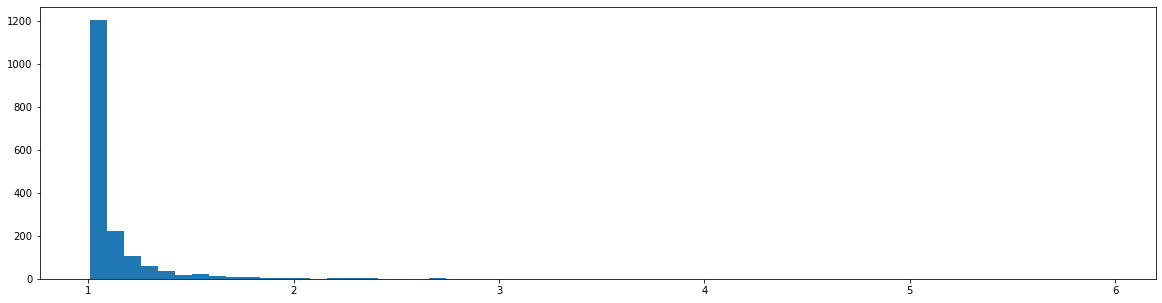

In [170]:
# Let's zoom in to the data higher than 1
plt.figure(figsize = [20,5])


plt.hist(data = df_loan[df_loan['BankcardUtilization']>1], x = 'BankcardUtilization', bins = 60);


In [171]:
df_loan[df_loan['BankcardUtilization']>3].BankcardUtilization

5031     4.73
26151    5.95
67184    3.47
71777    5.83
Name: BankcardUtilization, dtype: float64

The above 4 are the extreme outliers.

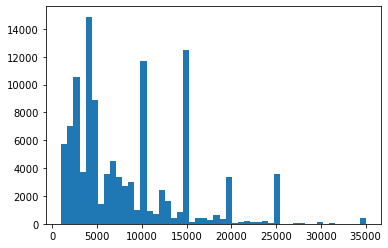

In [172]:
# now lets looke at the original loan amount

plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = 50);

This shows multiple peak, and loan amount tends to be around nice round number.

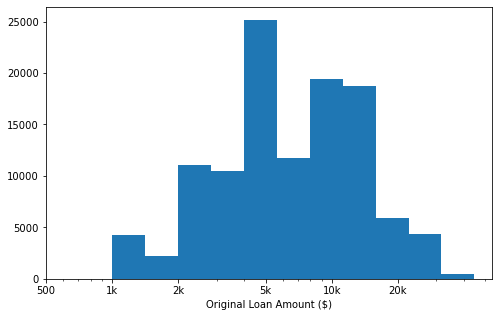

In [222]:
# There is a long tail in the distribution, so let's put it on a log scale instead.
log_binsize = 0.15
bins = 10**np.arange(3, np.log10(df_loan.LoanOriginalAmount.max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Original Loan Amount ($)')
plt.show()


This looks bimodal. 

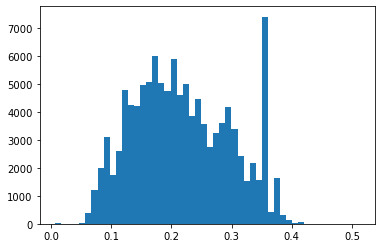

In [173]:
# Now Borrower's rate
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = 50);

This is bimodal,

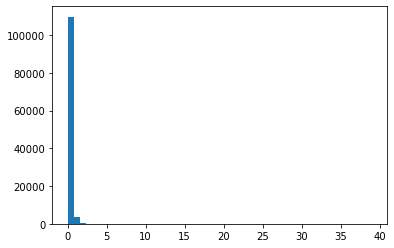

In [189]:
# now recommendations,
plt.hist(data = df_loan, x = 'Recommendations', bins = 50);

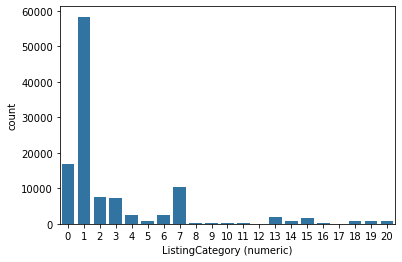

In [201]:
# now recommendations,
sb.countplot(data = df_loan, x = 'ListingCategory (numeric)', color = base_color);

Category details are as follows.
>0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Debt consolidation is the most frequent category.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Original loan amounts had a large range of values, and I looked at the data using a log transform. Under the transformation, it looks 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Changed data of 

## Bivariate Exploration

First off, I'd like to look at the pairwise correlations in the data.

In [ ]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!